#price 예측, 회귀분석 모델링 예정

###컬럼 설명
- Restaurant Name: This column contains the name of the restaurant to which the menu items and other details belong.

- Dining Rating: The "Dining Rating" column represents the average rating received by the restaurant for its dining experience. The rating is typically provided by customers who have dined at the restaurant and shared their feedback or reviews.

- Delivery Rating: The "Delivery Rating" column indicates the average rating received by the restaurant for its delivery service. This rating is based on customers' experiences with the restaurant's food delivery service.

- Dining Votes: This column shows the total number of votes or reviews received for the dining experience at the restaurant. Customers often rate their dining experiences by providing feedback or votes, which are used to calculate the average dining rating.

- Delivery Votes: The "Delivery Votes" column displays the total number of votes or reviews received for the delivery service provided by the restaurant. This column may contain "0" if delivery ratings are not applicable or unavailable.

- Place Name: This column provides the location or area where the restaurant is situated.

- City: The "City" column specifies the city in which the restaurant is located.

- Item Name: The "Item Name" column lists the name of the food items available at the restaurant. It includes various dishes and meals offered by the restaurant.

- Best Seller: The "Best Seller" column indicates whether a particular food item is a bestseller or not. It helps identify popular items among customers.

- Votes: The "Votes" column represents the total number of votes or reviews received for a specific food item. Customers may provide feedback or ratings for individual food items.

- *Prices*: This column displays the price of each food item. It shows the cost of each dish or meal offered by the restaurant.


In [94]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')

## 칼럼 확인
- 범주형 변수 : Restaurant_Name, Cuisine, Place_Name, City, Item_Name, Best_Seller
- 연속형 변수 : Dining_Rating, Delivery_Rating, Dining_Votes, Delivery_Votes, Votes

In [12]:
import pandas as pd
zd= pd.read_csv('zomato_dataset.csv')
zd

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [26]:
zd.tail(30)

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
123627,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,ChickenTuktuk,NaN,0,295.0
123628,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Plain Curd,NaN,0,125.0
123629,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mixed Raita,NaN,0,125.0
123630,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Pineapple Raita,NaN,0,125.0
123631,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Fruit Raita,NaN,0,125.0
123632,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Boondi Raita,NaN,0,125.0
123633,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Raita,NaN,0,125.0
123634,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Chutney,NaN,0,50.0
123635,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Moong Dal Halwa,BESTSELLER,21,195.0
123636,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Gulab Jamun,NaN,16,175.0


In [44]:
zd.corr()

<ipython-input-44-3b5f915acee6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  zd.corr()


,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Votes,Prices
Dining_Rating,1.000000,0.256528,0.211315,-0.108812,0.039426,0.061798
Delivery_Rating,0.256528,1.000000,0.131793,-0.065323,0.049206,0.053923
Dining Votes,0.211315,0.131793,1.000000,-0.244525,0.007271,0.016136
Delivery_Votes,-0.108812,-0.065323,-0.244525,1.000000,-0.063766,0.007060
Votes,0.039426,0.049206,0.007271,-0.063766,1.000000,-0.058036
Prices,0.061798,0.053923,0.016136,0.007060,-0.058036,1.000000


# 1. 결측치 확인
- Dining_Rating, Delivery_Rating, Best_Seller 결측치 존재
- Dining_Rating, Delivery_Rating은 결측치 채울만 한데
- Best_Seller 값은 결측치가 매우 많다. 거의 75% => 컬럼 삭제!

In [43]:
zd.isna().sum()

Restaurant_Name    0
Dining_Rating      0
Delivery_Rating    0
Dining Votes       0
Delivery_Votes     0
Cuisine            0
Place_Name         0
City               0
Item_Name          0
Votes              0
Prices             0
dtype: int64

### 1) Dining_Rating

In [33]:
# Dining_Rating이 Null일때 아닐때 Price 평균 비교 => 거의 분포가 동일!
print('일반 평균')
print(zd.Prices.describe())
temp = zd[zd.Dining_Rating.isnull()]
print('')
print('Dining_Rating이 Null일때 Price 평균')
print(temp.Prices.describe())

일반 평균
count    123657.000000
mean        241.378399
std         192.830713
min           0.950000
25%         130.000000
50%         208.570000
75%         299.000000
max       12024.000000
Name: Prices, dtype: float64

Dining_Rating이 Null일때 Price 평균
count    32236.000000
mean       245.332483
std        208.974849
min          0.950000
25%        129.000000
50%        200.000000
75%        299.000000
max       3999.000000
Name: Prices, dtype: float64


In [34]:
zd.Dining_Rating.describe()

count    91421.000000
mean         3.822264
std          0.408693
min          2.500000
25%          3.600000
50%          3.900000
75%          4.100000
max          4.800000
Name: Dining_Rating, dtype: float64

### 2)Delivery_Rating

In [37]:
# Delivery_Rating Null일때 아닐때 Price 평균 비교 => 거의 분포가 동일!
print('일반 평균')
print(zd.Prices.describe())
temp = zd[zd.Delivery_Rating.isnull()]
print('')
print('Dining_Rating이 Null일때 Price 평균')
print(temp.Prices.describe())

일반 평균
count    123657.000000
mean        241.378399
std         192.830713
min           0.950000
25%         130.000000
50%         208.570000
75%         299.000000
max       12024.000000
Name: Prices, dtype: float64

Dining_Rating이 Null일때 Price 평균
count    1280.000000
mean      224.775117
std       190.050529
min         8.000000
25%       120.000000
50%       190.000000
75%       269.250000
max      2399.000000
Name: Prices, dtype: float64


In [38]:
zd.Delivery_Rating.describe()

count    122377.000000
mean          3.963184
std           0.245900
min           2.500000
25%           3.800000
50%           4.000000
75%           4.100000
max           4.600000
Name: Delivery_Rating, dtype: float64

### 3) 결측치 대체 & 칼럼 삭제

In [42]:
# 결측치 평균으로 대체
zd['Delivery_Rating']= zd['Delivery_Rating'].fillna(zd['Delivery_Rating'].mean())
zd['Dining_Rating']= zd['Dining_Rating'].fillna(zd['Dining_Rating'].mean())
zd= zd[['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining Votes',
       'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name', 'Votes', 'Prices']]

# 범주형 변수 인코딩
- 범주형 변수 : Restaurant_Name, Cuisine, Place_Name, City, Item_Name, Best_Seller

### 1) Restaurant_Name : 레이블 인코딩
- Prices 평균 비싼대로 레이블링

In [85]:
zd.groupby('Restaurant_Name')['Prices'].mean().sort_values(ascending= False)

Restaurant_Name
Red Bucket Biryani           1011.718750
Zaffran Mataam Alarabi        805.652174
Cake Hut                      800.400000
Dum Safar Biryani             663.359447
Barbeque Nation               656.747899
                                ...     
RJ Chai Wala                   48.150000
Patil Misal                    46.846154
Bole To Vadapav                40.847458
Jai Bhavani Snacks Center      38.750000
Tea Shack                      35.833333
Name: Prices, Length: 826, dtype: float64

In [ ]:
res_name_sort= zd.groupby('Restaurant_Name')['Prices'].mean().sort_values(ascending= False).index
res_name_df= pd.DataFrame(columns = ['Name'])
for i in range(len(res_name_sort)):
  data= {'Name': res_name_sort[i]}
  res_name_df= res_name_df.append(data, ignore_index=True)
res_name_list = list(res_name_df.Name)
res_name_list

In [142]:
res_name_list.index("Tea Shack")

825

In [143]:
def name_enc(x):
  idx = res_name_list.index(x)
  return idx
zd['Restaurant_Name_Enc']= zd['Restaurant_Name'].apply(name_enc)

## 2) Cuisine : 레이블 인코딩

In [ ]:
zd['Cuisine '].value_counts()

In [ ]:
zd.groupby('Cuisine ')['Prices'].mean().sort_values(ascending= False)

In [154]:
cuis_sort= zd.groupby('Cuisine ')['Prices'].mean().sort_values(ascending= False).index
cuis_df= pd.DataFrame(columns = ['Cuisine'])
for i in range(len(cuis_sort)):
  data= {'Cuisine': cuis_sort[i]}
  cuis_df= cuis_df.append(data, ignore_index=True)
cuis_list = list(cuis_df.Cuisine)
cuis_list

['Vietnamese',
 'Lucknowi',
 'Andhra',
 'Continental',
 'Thai',
 'Kebab',
 'Seafood',
 'Rolls',
 'Mexican',
 'Biryani',
 'Hyderabadi',
 'Desserts',
 'Mughlai',
 'Fast Food',
 'Beverages',
 'Sichuan',
 'BBQ',
 'American',
 'Salad',
 'Turkish',
 'Burger',
 'Bakery',
 'Pasta',
 'Chinese',
 'Gujarati',
 'Momos',
 'Mithai',
 'Healthy Food',
 'Mandi',
 'North Indian',
 'Pizza',
 'Rajasthani',
 'Sandwich',
 'Awadhi',
 'Italian',
 'Shake',
 'South Indian',
 'Wraps',
 'Coffee',
 'Ice Cream',
 'Juices',
 'Street Food',
 'Tibetan',
 'Shawarma',
 'Kathiyawadi',
 'Kerala',
 'Maharashtrian',
 'Tea']

In [156]:
def cuis_enc(x):
  idx = cuis_list.index(x)
  return idx
zd['Cuisine_Enc']= zd['Cuisine '].apply(cuis_enc)

## 3) Place_Name : 레이블 인코딩

In [158]:
zd.Place_Name.value_counts()

C Scheme           3775
Navrangpura        1936
Chembur            1826
Charminar          1751
Abids              1668
                   ... 
Shobha Bazar         16
Das Naagar           15
Elamakkara           13
Tripunithura          9
Deccan Gymkhana       4
Name: Place_Name, Length: 324, dtype: int64

In [ ]:
zd.groupby('Place_Name')['Prices'].mean().sort_values(ascending= False)

In [ ]:
place_sort= zd.groupby('Place_Name')['Prices'].mean().sort_values(ascending= False).index
place_df= pd.DataFrame(columns = ['Place_Name'])
for i in range(len(place_sort)):
  data= {'Place_Name': place_sort[i]}
  place_df= place_df.append(data, ignore_index=True)
  place_list = list(place_df.Place_Name)
place_list

In [161]:
def place_enc(x):
  idx = place_list.index(x)
  return idx
zd['Place_Enc']= zd['Place_Name'].apply(place_enc)

## 4) City : 레이블 인코딩

In [162]:
zd.City.value_counts()

 Hyderabad       15613
 Jaipur          14438
 Mumbai          13535
 Chennai         13100
 Bangalore       12040
 Ahmedabad       10178
 Kolkata          8662
 Pune             8067
 Kochi            7759
 Raipur           7700
 Lucknow          6455
 New Delhi        3490
 Goa              2360
 Banaswadi          97
 Ulsoor             66
 Magrath Road       54
 Malleshwaram       43
Name: City, dtype: int64

In [163]:
zd.groupby('City')['Prices'].mean().sort_values(ascending= False)

City
 Ulsoor          670.242424
 Banaswadi       335.893299
 Mumbai          304.402778
 Chennai         261.863993
 Hyderabad       245.130482
 Pune            242.170568
 Kolkata         239.819348
 Lucknow         235.550603
 New Delhi       235.347676
 Bangalore       233.416551
 Magrath Road    226.769815
 Kochi           225.954220
 Ahmedabad       223.676576
 Goa             222.994746
 Jaipur          217.163255
 Malleshwaram    196.860465
 Raipur          194.591645
Name: Prices, dtype: float64

In [164]:
city_sort= zd.groupby('City')['Prices'].mean().sort_values(ascending= False).index
city_df= pd.DataFrame(columns = ['City'])
for i in range(len(city_sort)):
  data= {'City': city_sort[i]}
  city_df= city_df.append(data, ignore_index=True)
  city_list = list(city_df.City)
city_list

[' Ulsoor',
 ' Banaswadi',
 ' Mumbai',
 ' Chennai',
 ' Hyderabad',
 ' Pune',
 ' Kolkata',
 ' Lucknow',
 ' New Delhi',
 ' Bangalore',
 ' Magrath Road',
 ' Kochi',
 ' Ahmedabad',
 ' Goa',
 ' Jaipur',
 ' Malleshwaram',
 ' Raipur']

In [165]:
def city_enc(x):
  idx = city_list.index(x)
  return idx
zd['City_Enc']= zd['City'].apply(city_enc)

In [166]:
zd

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Votes,Prices,Restaurant_Name_Enc,Cuisine_Enc,Place_Enc,City_Enc
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,84,249.0,563,13,142,4
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,45,129.0,563,13,142,4
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,39,189.0,563,13,142,4
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,43,189.0,563,13,142,4
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,31,205.0,563,13,142,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,0,525.0,75,30,68,16
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,0,525.0,75,30,68,16
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,0,525.0,75,30,68,16
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,0,525.0,75,30,68,16


## 5) Item_Name : 레이블 인코딩

In [167]:
zd.Item_Name.value_counts()

Veg Fried Rice                   322
Paneer Butter Masala             319
Chicken Fried Rice               278
Jeera Rice                       231
Chicken Biryani                  226
                                ... 
Chicken Chinese Choupsey           1
Chicken Burn Chilli Noodles        1
Chicken Chilli Oyster Noodles      1
Prawn American Choupsey            1
ChickenTuktuk                      1
Name: Item_Name, Length: 55693, dtype: int64

In [168]:
zd.groupby('Item_Name')['Prices'].mean().sort_values(ascending= False)

Item_Name
Bakra Massallam [8 kg]        12024.000000
20 Person Mutton Biriyani      6500.000000
THF Golden Boat Basket         5593.220000
20 Person Chicken Biriyani     4900.000000
15 Person Mutton Biriyani      4200.000000
                                  ...     
Chilli Sauce Sachet               1.900000
Ketchup                           1.839474
Ketchup Sachet                    1.362500
Maida Base                        1.000000
Tomato Ketchup Sachet             0.950000
Name: Prices, Length: 55693, dtype: float64

In [169]:
item_sort= zd.groupby('Item_Name')['Prices'].mean().sort_values(ascending= False).index
item_df= pd.DataFrame(columns = ['Item_Name'])
for i in range(len(item_sort)):
  data= {'Item': item_sort[i]}
  item_df= item_df.append(data, ignore_index=True)
  item_list = list(item_df.Item)
item_list

['Bakra Massallam [8 kg]',
 '20 Person Mutton Biriyani',
 'THF Golden Boat Basket',
 '20 Person Chicken Biriyani',
 '15 Person Mutton Biriyani',
 'THF Extravaganza Basket',
 'Grand Celebration:2 Biryanis (Non Veg)+4 portions Kebabs+4 Coca-Cola',
 'Large Mutton Briyani',
 'Grand Celebration:2 Biryanis(Veg+Non-Veg)+4 portion Kebab+4 Coca-Cola',
 'Basmathi Mutton Biriyani - 1 Padi',
 'Jeeraga Mutton Biriyani - 1 Padi',
 'Mega Chicken Bucket Biryani [Serves 8]',
 '8 To 10 Person Mutton Biriyani',
 'Family Party Combo (serves 8)',
 "Baker's Gourmet Basket",
 'THF Healthy Goodies Basket',
 '15 Person Chicken Biriyani',
 'Prawns Biryani [10 Persons]',
 'Mutton Biryani [10 Persons]',
 'Chicken 65 Biryani [10 Persons]',
 'Party Bucket Mutton Biriyani',
 'Indulgence Hamper',
 'Cake Dinosour',
 'Mandi Town Special Mandi Platter',
 'Raan Biryani Makhani (Serves 4-6)',
 'Raan Biryani Bhuna (Serves 4-6)',
 'Large Chicken Briyani',
 'Red Bucket Special Biryani [10 Persons]',
 'THF Healthy Feast Baske

In [186]:
def item_enc(x):
  idx = item_list.index(x)
  return idx
zd['Item_Enc']= zd['Item_Name'].apply(item_enc)

In [181]:
zd.columns

Index(['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining Votes',
       'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name',
       'Votes', 'Prices', 'Restaurant_Name_Enc', 'Cuisine_Enc', 'Place_Enc',
       'City_Enc', 'MinMax_Dining_Rating', 'MinMax_Delivery_Rating',
       'Robust_Delivery_Votes'],
      dtype='object')

# 연속형 변수
- Dining_Rating, Delivery_Rating, Dining_Votes, Delivery_Votes, Votes

## 1) Dining_Rating : MinMaxScaler()

<Axes: >

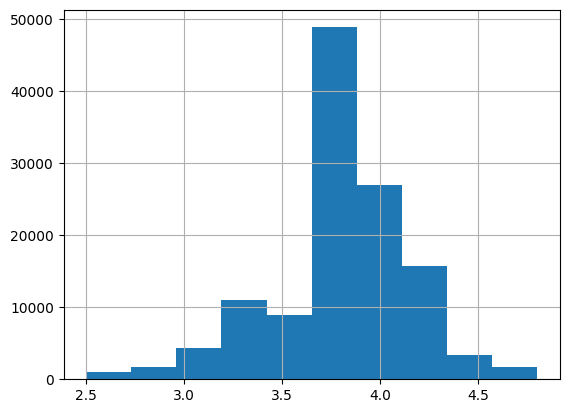

In [170]:
zd.Dining_Rating.hist()

In [177]:
# MinMaxScaler 적용
import numpy as np
from sklearn.preprocessing import MinMaxScaler
items = np.array(zd.Dining_Rating).reshape(-1,1)

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(items)
items_scaled = scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_scaled.min())
print('\nfeature들의 최댓값')
print(items_scaled.max())

#칼럼추가
zd['MinMax_Dining_Rating']= items_scaled

feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64


## 2) Delivery_Rating : MinMaxScaler()

<Axes: >

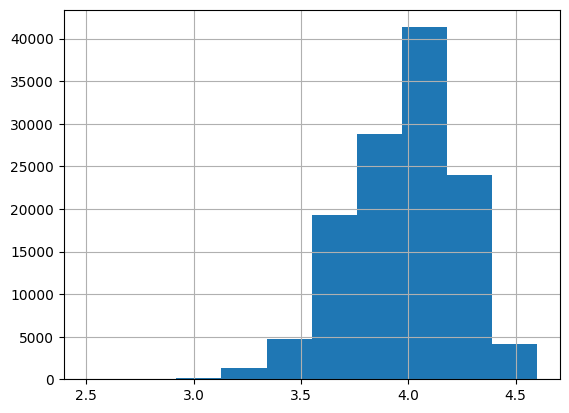

In [171]:
zd.Delivery_Rating.hist()

In [178]:
# MinMaxScaler 적용
import numpy as np
from sklearn.preprocessing import MinMaxScaler
items = np.array(zd.Delivery_Rating).reshape(-1,1)

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(items)
items_scaled = scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_scaled.min())
print('\nfeature들의 최댓값')
print(items_scaled.max())

#칼럼추가
zd['MinMax_Delivery_Rating']= items_scaled

feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64


## 3) Delivery_Votes : RobustScaler()

<Axes: >

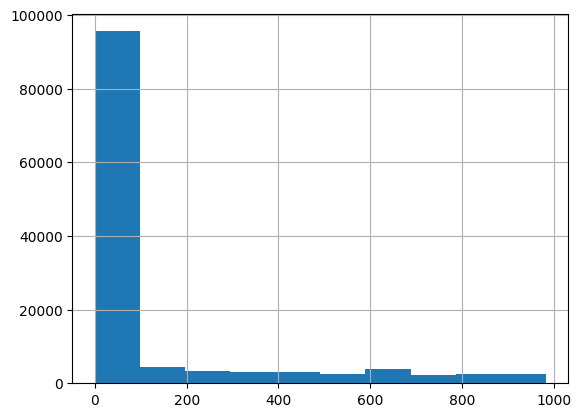

In [172]:
zd.Delivery_Votes.hist()

In [179]:
from sklearn.preprocessing import RobustScaler

#2차원 ndarray로 변환
items = np.array(zd.Delivery_Votes).reshape(-1,1)

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(items)

# 훈련 데이터 스케일링
items_scaled = robust_scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_df_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_df_scaled.min())
print('\nfeature들의 최댓값')
print(items_df_scaled.max())

# 칼럼 추가
zd['Robust_Delivery_Votes']= items_scaled


feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    42.73913
dtype: float64


## 4) Dining_Votes : RobustScaler()

<Axes: >

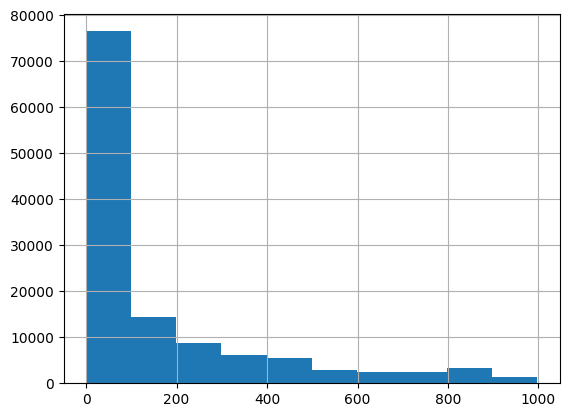

In [182]:
zd['Dining Votes'].hist()

In [183]:
from sklearn.preprocessing import RobustScaler

#2차원 ndarray로 변환
items = np.array(zd['Dining Votes']).reshape(-1,1)

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(items)

# 훈련 데이터 스케일링
items_scaled = robust_scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_df_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_df_scaled.min())
print('\nfeature들의 최댓값')
print(items_df_scaled.max())

# 칼럼 추가
zd['Robust_Dining_Votes']= items_scaled


feature들의 최솟값
0   -0.138249
dtype: float64

feature들의 최댓값
0    4.456221
dtype: float64


## 5) Votes : RobustScaler()



count    123657.000000
mean         24.666772
std         125.236009
min           0.000000
25%           0.000000
50%           0.000000
75%          15.000000
max        9750.000000
Name: Votes, dtype: float64


<Axes: >

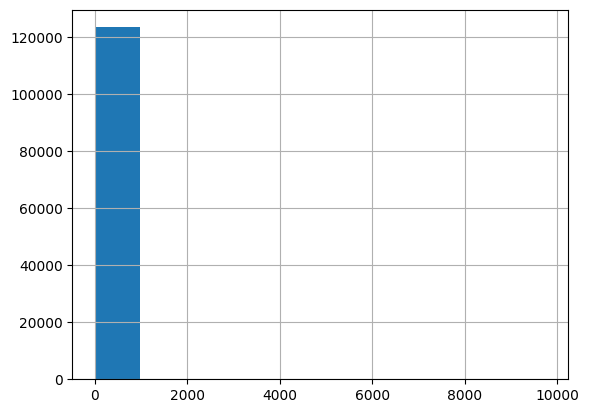

In [176]:
print(zd.Votes.describe())
zd.Votes.hist()

In [184]:
from sklearn.preprocessing import RobustScaler

#2차원 ndarray로 변환
items = np.array(zd.Votes).reshape(-1,1)

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(items)

# 훈련 데이터 스케일링
items_scaled = robust_scaler.transform(items)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
items_df_scaled = pd.DataFrame(data=items_scaled)
print('feature들의 최솟값')
print(items_df_scaled.min())
print('\nfeature들의 최댓값')
print(items_df_scaled.max())

# 칼럼 추가
zd['Robust_Votes']= items_scaled

feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    650.0
dtype: float64


In [187]:
zd.columns

Index(['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining Votes',
       'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name',
       'Votes', 'Prices', 'Restaurant_Name_Enc', 'Cuisine_Enc', 'Place_Enc',
       'City_Enc', 'MinMax_Dining_Rating', 'MinMax_Delivery_Rating',
       'Robust_Delivery_Votes', 'Robust_Dining_Votes', 'Robust_Votes',
       'Item_Enc'],
      dtype='object')

In [191]:
final = zd[['Item_Enc','Restaurant_Name_Enc', 'Cuisine_Enc', 'Place_Enc',
       'City_Enc', 'MinMax_Dining_Rating', 'MinMax_Delivery_Rating',
       'Robust_Delivery_Votes', 'Robust_Dining_Votes', 'Robust_Votes',  'Prices']]
final

,Item_Enc,Restaurant_Name_Enc,Cuisine_Enc,Place_Enc,City_Enc,MinMax_Dining_Rating,MinMax_Delivery_Rating,Robust_Delivery_Votes,Robust_Dining_Votes,Robust_Votes,Prices
0,23575,563,13,142,4,0.608696,0.809524,0.00000,0.041475,5.600000,249.0
1,44773,563,13,142,4,0.608696,0.809524,0.00000,0.041475,3.000000,129.0
2,33505,563,13,142,4,0.608696,0.809524,0.00000,0.041475,2.600000,189.0
3,33278,563,13,142,4,0.608696,0.809524,0.00000,0.041475,2.866667,189.0
4,30157,563,13,142,4,0.608696,0.809524,0.00000,0.041475,2.066667,205.0
...,...,...,...,...,...,...,...,...,...,...,...
123652,5455,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
123653,3877,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
123654,3842,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
123655,3844,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0


In [192]:
final.to_csv('0806_zomato.csv', index = False )

In [193]:
pd.read_csv('/content/0806_zomato.csv')

,Item_Enc,Restaurant_Name_Enc,Cuisine_Enc,Place_Enc,City_Enc,MinMax_Dining_Rating,MinMax_Delivery_Rating,Robust_Delivery_Votes,Robust_Dining_Votes,Robust_Votes,Prices
0,23575,563,13,142,4,0.608696,0.809524,0.00000,0.041475,5.600000,249.0
1,44773,563,13,142,4,0.608696,0.809524,0.00000,0.041475,3.000000,129.0
2,33505,563,13,142,4,0.608696,0.809524,0.00000,0.041475,2.600000,189.0
3,33278,563,13,142,4,0.608696,0.809524,0.00000,0.041475,2.866667,189.0
4,30157,563,13,142,4,0.608696,0.809524,0.00000,0.041475,2.066667,205.0
...,...,...,...,...,...,...,...,...,...,...,...
123652,5455,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
123653,3877,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
123654,3842,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
123655,3844,75,30,68,16,0.608696,0.809524,22.73913,-0.078341,0.000000,525.0
